In [6]:
import numpy as np
import pandas as pd

from PIL import Image

import matplotlib.pyplot as plt


import generate_image_labels as giLabels
import edge_feature_generation as efg

%matplotlib inline
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (7,5)

In [3]:
full_df = giLabels.gen_retrain_labels()

In [4]:
def flip( inp_arr ):
    return inp_arr[::-1]

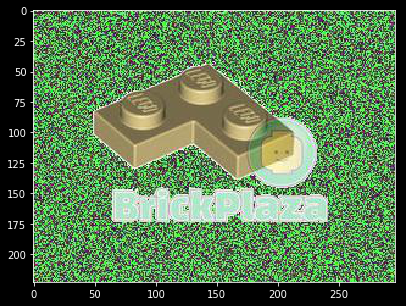

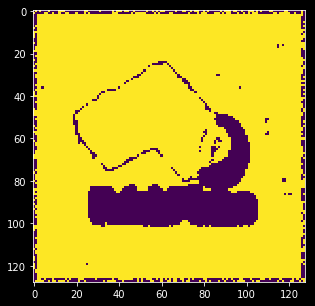

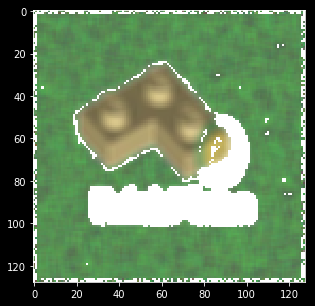

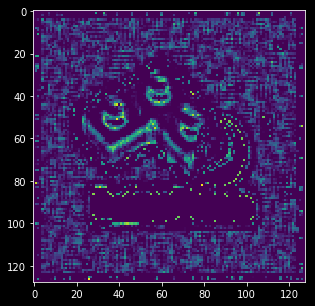

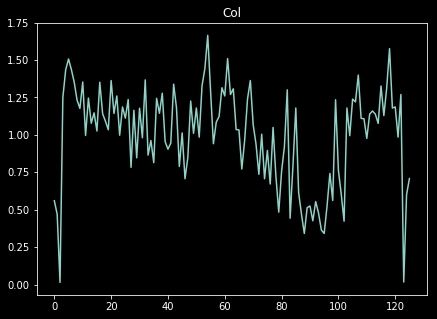

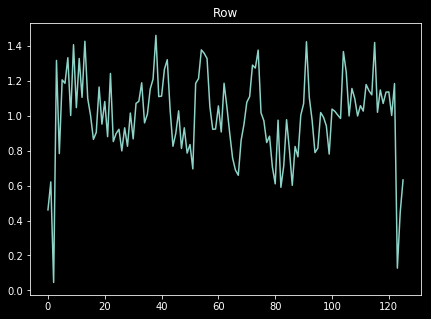

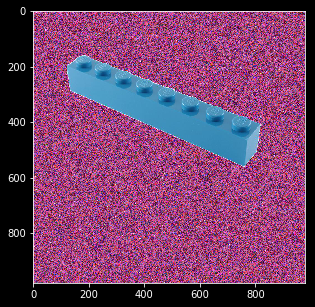

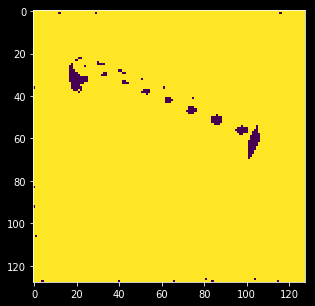

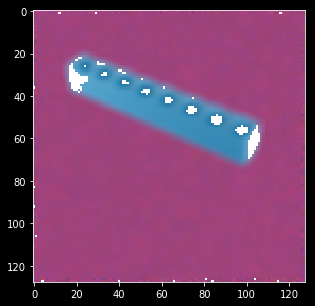

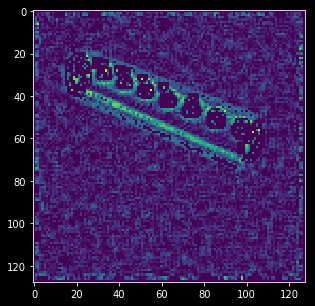

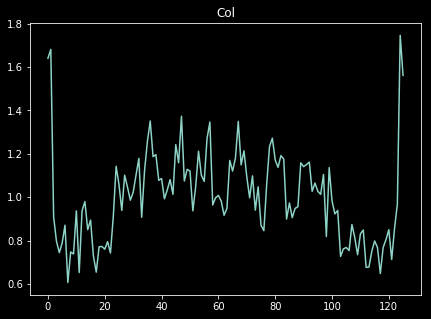

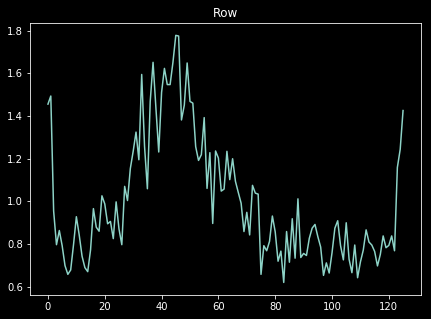

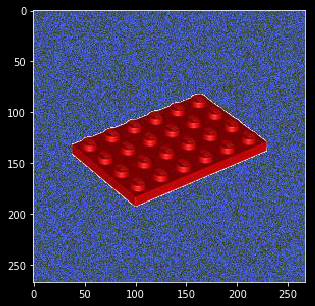

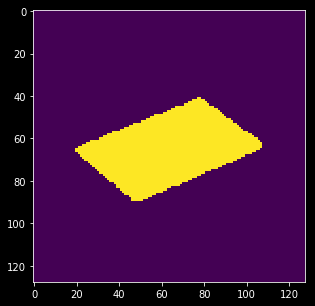

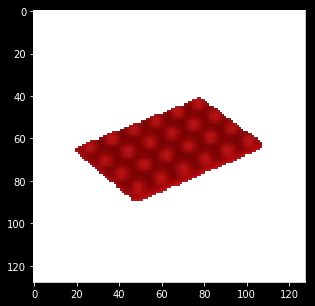

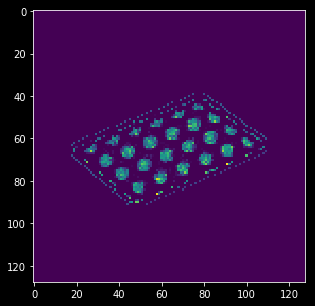

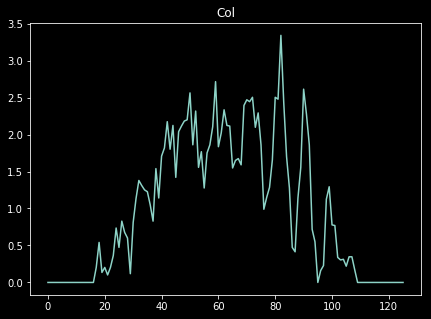

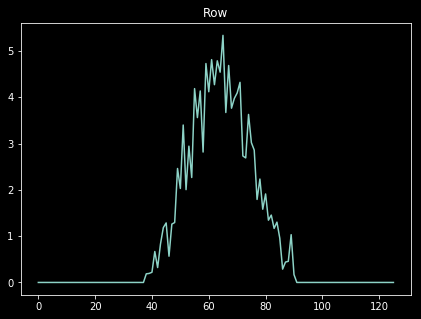

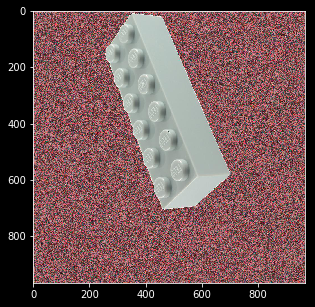

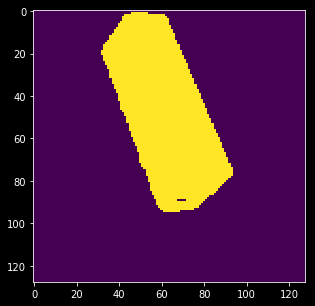

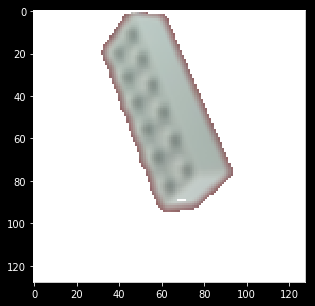

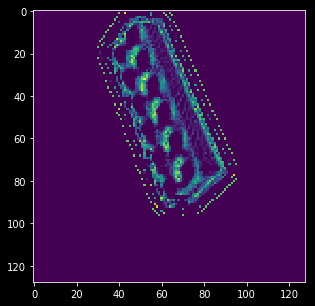

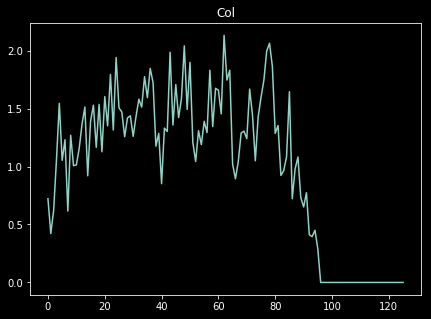

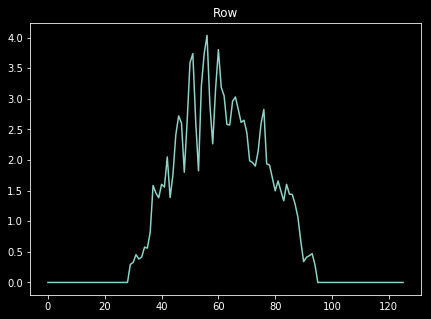

In [10]:
# Go image by image
# pass through image processing pipeline to generate features
# Flip, rotate, each time rot/flipping rc sums and rc ratio
# Dont actually need to rotate or process each image


for i in range( 0, full_df.shape[0], 2000 ):

    inp_img = full_df.loc[i,'img_path']
    foo = Image.open(inp_img)
    plt.imshow(foo)
    plt.show()
    edge_arr = efg.get_img_edge_data( 
                                inp_img,
                                size=[128,128],
                                edge_cutoff=20,
                                edge_smooth=3,
                                rot_img=False,
                                display=True,
                                ret_arr=True,
                               )

    
    rc_ratio, row, col = efg.get_edge_features( edge_arr, display=True )
    
    

In [34]:
# Go image by image
# pass through image processing pipeline to generate features
# Flip, rotate, each time rot/flipping rc sums and rc ratio
# Dont actually need to rotate or process each image

out_df = pd.DataFrame( 
                        columns=['img_path']+
                                ['rc_ratio']+
                                ['row_'+str(i) for i in range(0,126)]+
                                ['col_'+str(i) for i in range(0,126)]
                     )

img_counter = 46173
for i in range( 5771, full_df.shape[0] ):

    inp_img = full_df.loc[i,'img_path']
    edge_arr = efg.get_img_edge_data( 
                                inp_img,
                                size=[128,128],
                                edge_cutoff=20,
                                edge_smooth=3,
                                rot_img=False,
                                display=False,
                                ret_arr=True,
                               )

    
    rc_ratio, row, col = efg.get_edge_features( edge_arr, display=False )
    
#    row, col
    row_col_combinations = [
                                [       row  ,       col  ],
                                [       row  , flip( col )],
                                [ flip( row ),       col  ],
                                [ flip( row ), flip( col )],       
                                [       col  ,       row  ],
                                [       col  , flip( row )],
                                [ flip( col ),       row  ], 
                                [ flip( col ), flip( row )],
                           ]

    for j in range( 0, len(row_col_combinations) ):
    
        rc = rc_ratio
        if ( j > 3 ):
            rc = 1./rc_ratio

        out_list = [inp_img,rc,]+row_col_combinations[j][0].tolist()+row_col_combinations[j][1].tolist()
        
        out_df.loc[img_counter,:] = out_list
    
        img_counter = img_counter + 1

In [ ]:
# Combine out_df with old_out_df, merge with full_df, save to csv

In [35]:
out_df.tail()

,img_path,rc_ratio,row_0,row_1,row_2,row_3,row_4,row_5,row_6,row_7,...,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125
54400,/home/sean/Desktop/lego_dirty_close/roof_tile_...,1,0.442485,0.386592,0.072195,0.909424,0.92689,0.966481,1.32746,1.33328,...,0.852366,0.728936,0.848873,1.36938,2.03077,1.77111,2.02845,0.193296,0.386592,0.371455
54401,/home/sean/Desktop/lego_dirty_close/roof_tile_...,1,0.371455,0.386592,0.193296,2.02845,1.77111,2.03077,1.36938,0.848873,...,1.3717,1.30999,1.33328,1.32746,0.966481,0.92689,0.909424,0.072195,0.386592,0.442485
54402,/home/sean/Desktop/lego_dirty_close/roof_tile_...,1,0.371455,0.386592,0.193296,2.02845,1.77111,2.03077,1.36938,0.848873,...,0.942028,0.833735,0.96881,1.32746,1.03518,0.893122,1.01888,0,0.37029,0.464609
54403,/home/sean/Desktop/lego_dirty_close/roof_tile_...,1,0.305082,0.231723,0.0675372,1.218,0.827913,0.971139,0.872162,1.23197,...,1.3717,1.30999,1.33328,1.32746,0.966481,0.92689,0.909424,0.072195,0.386592,0.442485
54404,/home/sean/Desktop/lego_dirty_close/roof_tile_...,1,0.305082,0.231723,0.0675372,1.218,0.827913,0.971139,0.872162,1.23197,...,0.942028,0.833735,0.96881,1.32746,1.03518,0.893122,1.01888,0,0.37029,0.464609


In [15]:
print out_df.loc[16499,'img_path']
print full_df.loc[2062,'img_path']

/home/sean/Desktop/lego_dirty_close/plate_1x3/2214_rescale.jpg
/home/sean/Desktop/lego_dirty_close/plate_1x3/2214_rescale.jpg


In [30]:
print out_df.loc[46173,'img_path']
print full_df.loc[5771,'img_path']

/home/sean/Desktop/lego_dirty_close/corner_plate_1x2x2/6227_rescale.jpg
/home/sean/Desktop/lego_dirty_close/corner_plate_1x2x2/6339_rescale.jpg


In [36]:
54400/8

6800

In [37]:
old_out_df_4 = out_df.copy()

In [ ]:
old_out_df_4.to_csv('temp_')

old_out_df_3 = out_df.copy()

old_out_df_3.to_csv('temp_3.csv')

old_out_df   = out_df.copy()

old_out_df.to_csv('temp.csv')

old_out_df_2 = out_df.copy()

old_out_df_2.to_csv('temp_2.csv')

In [6]:
out_1 = pd.read_csv('temp.csv'  ).drop('Unnamed: 0',axis=1)
out_2 = pd.read_csv('temp_2.csv').drop('Unnamed: 0',axis=1)
out_3 = pd.read_csv('temp_4.csv').drop('Unnamed: 0',axis=1)

In [7]:
out_1.shape[0]+out_2.shape[0]+out_3.shape[0]

54406

In [8]:
print full_df.shape[0], full_df.shape[0]*8

6800 54400


In [10]:
out_df = pd.concat( [out_1,out_2,out_3], axis=0, ignore_index=True )
out_df.head()

,img_path,rc_ratio,row_0,row_1,row_2,row_3,row_4,row_5,row_6,row_7,...,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125
0,/home/sean/Desktop/lego_dirty_close/brick_corn...,0.992063,0.461218,0.622010,0.045134,1.318774,0.784212,1.207348,1.187601,1.334289,...,1.128362,1.311721,1.575476,1.179139,1.186191,0.984496,1.269408,0.016925,0.600853,0.708047
1,/home/sean/Desktop/lego_dirty_close/brick_corn...,0.992063,0.461218,0.622010,0.045134,1.318774,0.784212,1.207348,1.187601,1.334289,...,1.176318,1.232736,1.351214,1.435841,1.506364,1.434431,1.249661,0.014105,0.469681,0.559950
2,/home/sean/Desktop/lego_dirty_close/brick_corn...,0.992063,0.633293,0.447114,0.126941,1.186191,1.002832,1.138236,1.136825,1.071944,...,1.128362,1.311721,1.575476,1.179139,1.186191,0.984496,1.269408,0.016925,0.600853,0.708047
3,/home/sean/Desktop/lego_dirty_close/brick_corn...,0.992063,0.633293,0.447114,0.126941,1.186191,1.002832,1.138236,1.136825,1.071944,...,1.176318,1.232736,1.351214,1.435841,1.506364,1.434431,1.249661,0.014105,0.469681,0.559950
4,/home/sean/Desktop/lego_dirty_close/brick_corn...,1.008000,0.559950,0.469681,0.014105,1.249661,1.434431,1.506364,1.435841,1.351214,...,1.021168,1.149519,1.071944,1.136825,1.138236,1.002832,1.186191,0.126941,0.447114,0.633293


In [12]:
foo = pd.merge( full_df, out_df, left_on='img_path', right_on='img_path', how='inner' ) 
foo.to_csv('refit_labelled.csv')

In [ ]:
foo = pd.merge( full_df, out_df, left_on='img_path', right_on='img_path', how='inner' ) 

In [ ]:
print foo.shape